In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, MeanShift
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import scipy.cluster.hierarchy as sch
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Wholesale customers data.csv")
print("\nSummary Stats:")
df.describe()


Summary Stats:


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


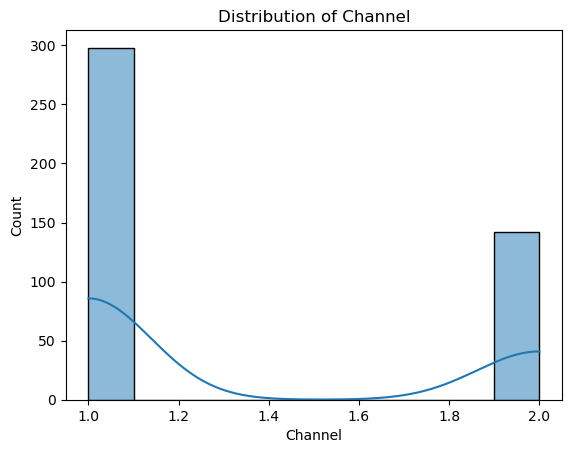

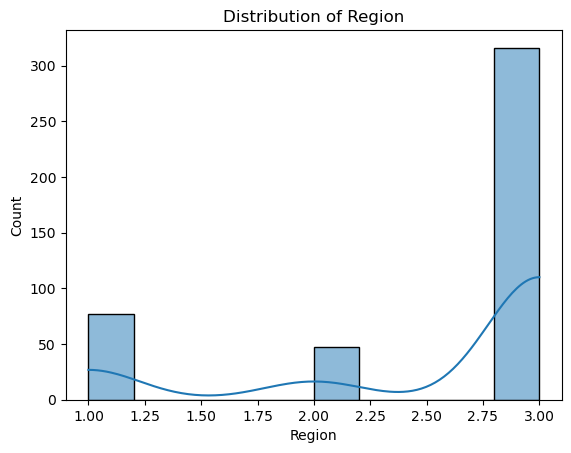

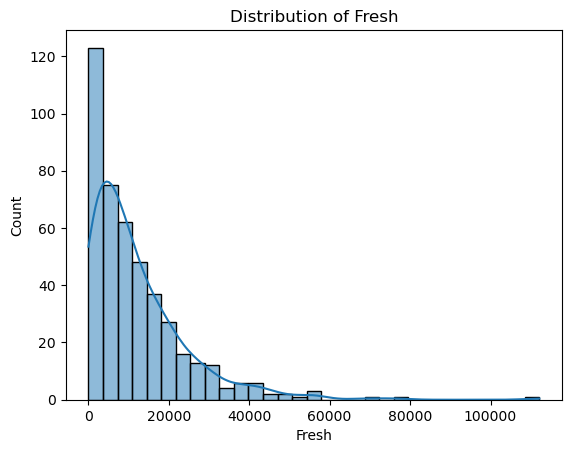

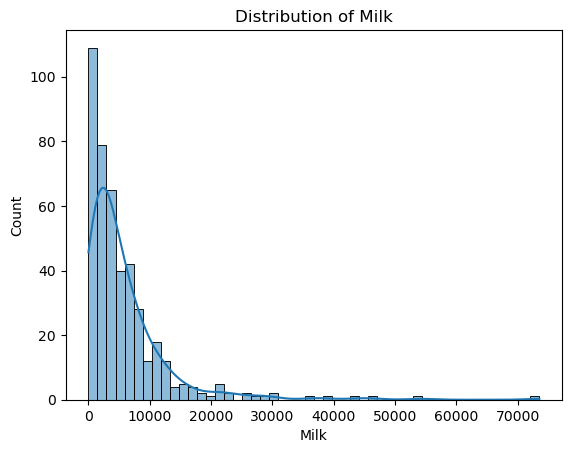

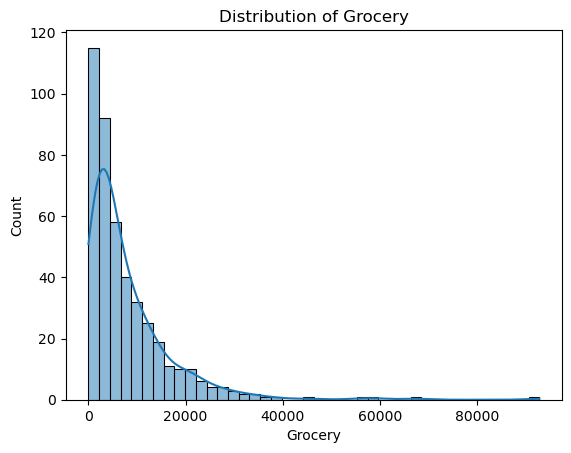

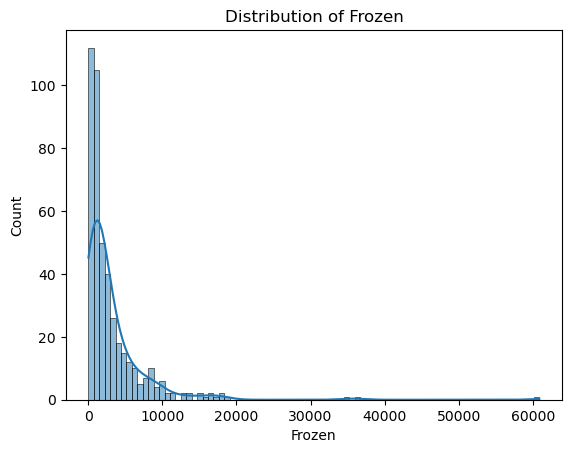

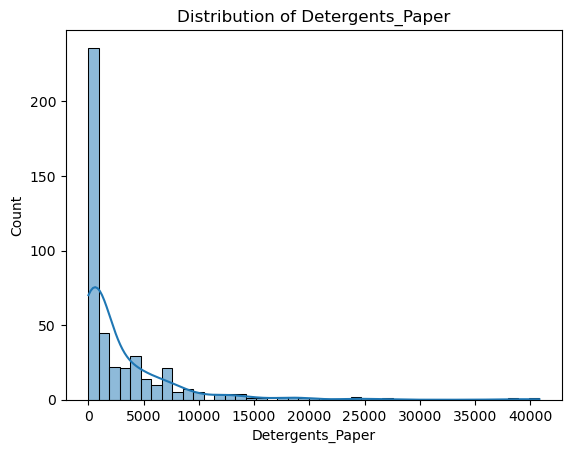

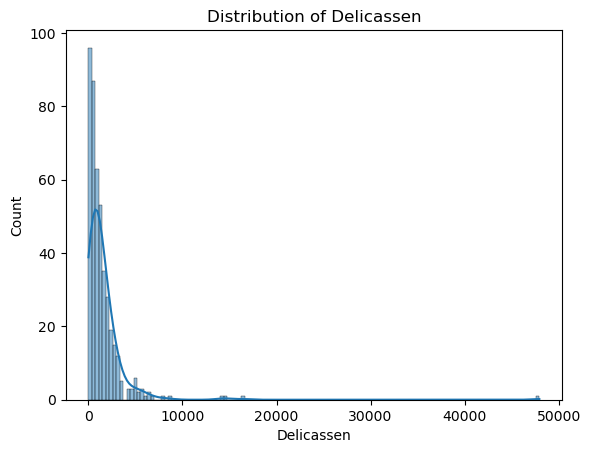

In [3]:
num_cols = df.select_dtypes(include=np.number).columns
for col in num_cols:
    plt.figure()
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

In [4]:
# Log-transform for skewed data
df_log = df[num_cols].apply(lambda x: np.log1p(x))

In [5]:
# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_log)

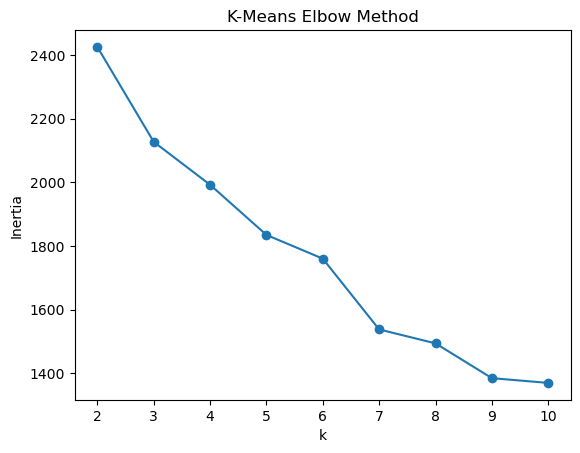

In [6]:
# 1. K-Means with Elbow
inertia = []
for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.figure()
plt.plot(range(2, 11), inertia, marker='o')
plt.title("K-Means Elbow Method")
plt.xlabel("k")
plt.ylabel("Inertia")
plt.show()

In [7]:
# Best K based on elbow (you can adjust)
best_k = 3
kmeans = KMeans(n_clusters=best_k, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

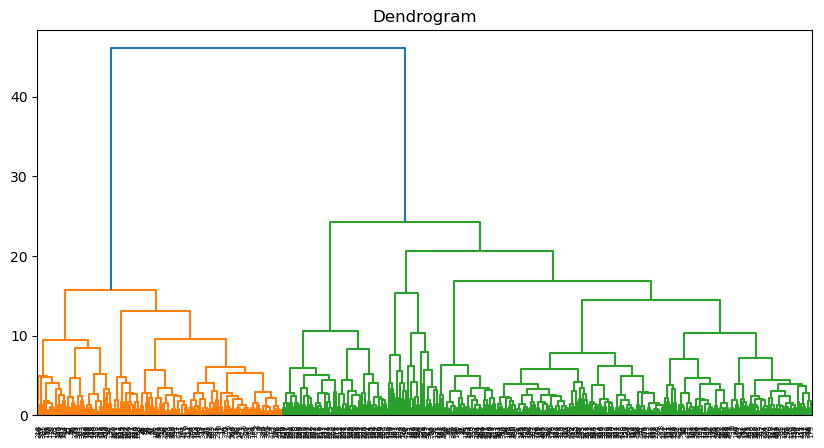

In [8]:

# 2. Hierarchical Clustering (dendrogram)
plt.figure(figsize=(10, 5))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title("Dendrogram")
plt.show()

hier = AgglomerativeClustering(n_clusters=best_k, linkage='ward')
hier_labels = hier.fit_predict(X_scaled)

In [9]:
# 3. DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)
db_labels = dbscan.fit_predict(X_scaled)

In [10]:
# 4. MeanShift
meanshift = MeanShift()
ms_labels = meanshift.fit_predict(X_scaled)

def evaluate_clustering(X, labels, name):
    if len(set(labels)) > 1 and -1 not in set(labels):
        sil = silhouette_score(X, labels)
        db = davies_bouldin_score(X, labels)
        ch = calinski_harabasz_score(X, labels)
        print(f"{name}: Silhouette={sil:.3f}, Davies-Bouldin={db:.3f}, Calinski-Harabasz={ch:.3f}")
    else:
        print(f"{name}: Not enough clusters for evaluation")



In [11]:
evaluate_clustering(X_scaled, kmeans_labels, "KMeans")
evaluate_clustering(X_scaled, hier_labels, "Hierarchical")
evaluate_clustering(X_scaled, db_labels, "DBSCAN")
evaluate_clustering(X_scaled, ms_labels, "MeanShift")

KMeans: Silhouette=0.204, Davies-Bouldin=1.751, Calinski-Harabasz=143.037
Hierarchical: Silhouette=0.265, Davies-Bouldin=1.460, Calinski-Harabasz=136.451
DBSCAN: Not enough clusters for evaluation
MeanShift: Silhouette=0.257, Davies-Bouldin=0.977, Calinski-Harabasz=14.327


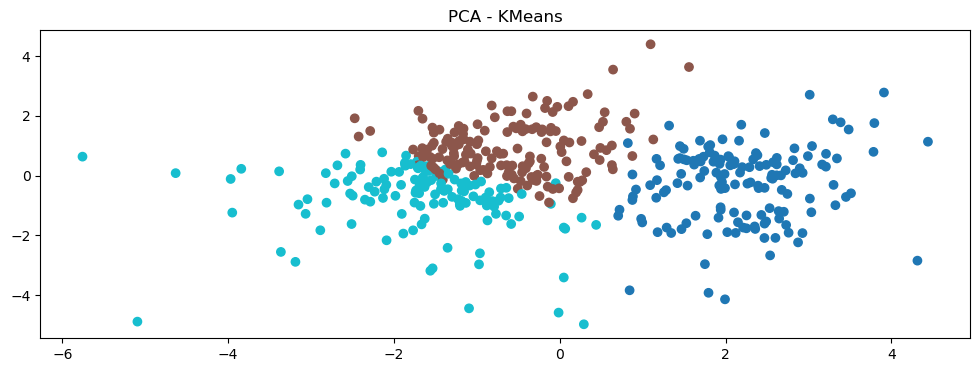

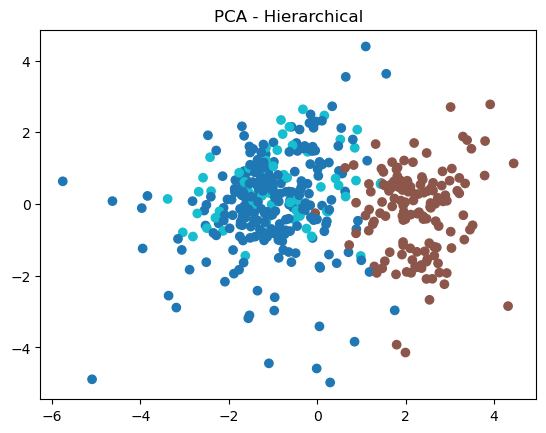

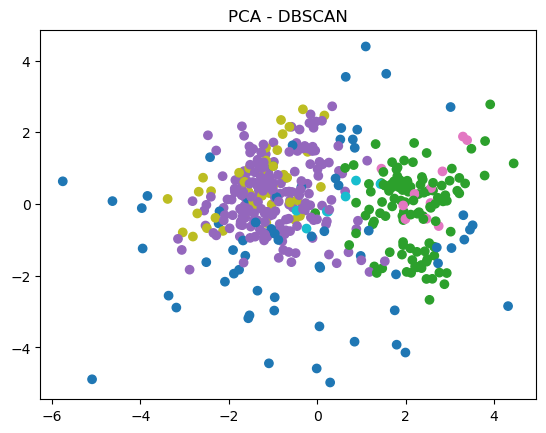

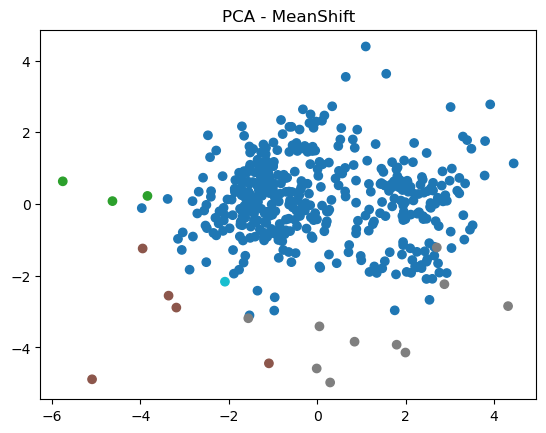

In [12]:
# PCA 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(12, 4))
for labels, title in [(kmeans_labels, 'KMeans'), (hier_labels, 'Hierarchical'), (db_labels, 'DBSCAN'), (ms_labels, 'MeanShift')]:
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='tab10')
    plt.title(f"PCA - {title}")
    plt.show()

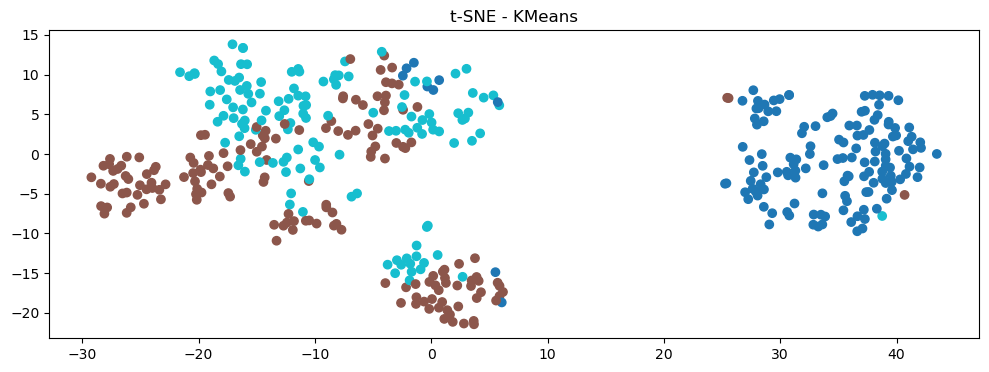

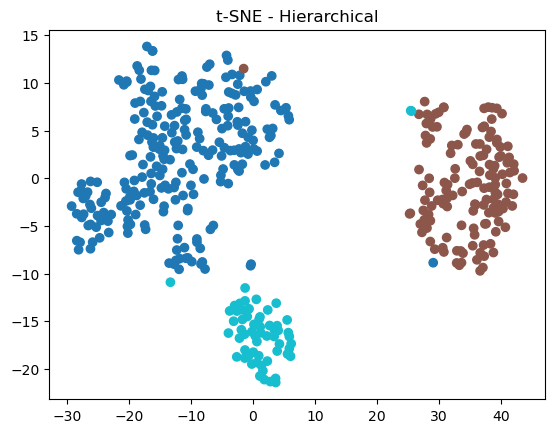

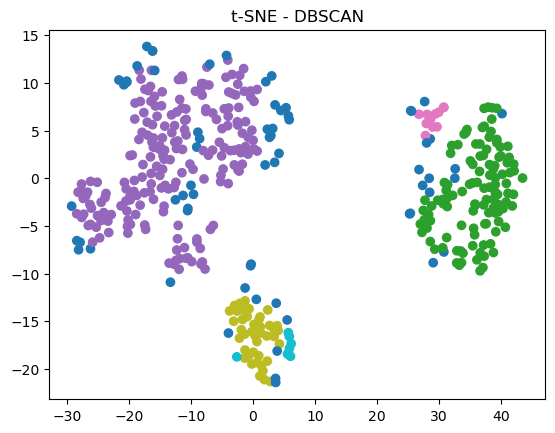

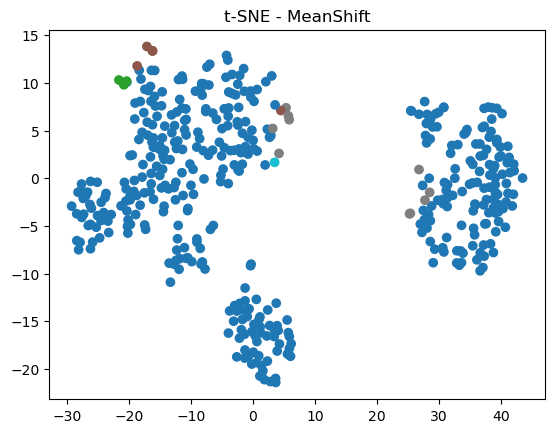

In [13]:
# t-SNE for better visualization
X_tsne = TSNE(n_components=2, random_state=42, perplexity=30).fit_transform(X_scaled)

plt.figure(figsize=(12, 4))
for labels, title in [(kmeans_labels, 'KMeans'), (hier_labels, 'Hierarchical'), (db_labels, 'DBSCAN'), (ms_labels, 'MeanShift')]:
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='tab10')
    plt.title(f"t-SNE - {title}")
    plt.show()